# MOVIE RECOMMENDER SYSTEM

In [1]:
#importing all required libraries
import re
import numpy as np
import scipy.stats
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#reading the datasets
movies=pd.read_csv('movies.csv')
ratings=pd.read_csv('ratings.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [4]:
movies.shape


(10329, 3)

In [5]:
ratings.shape


(105339, 4)

In [6]:
movies.describe()

,movieId
count,10329.000000
mean,31924.282893
std,37734.741149
min,1.000000
25%,3240.000000
50%,7088.000000
75%,59900.000000
max,149532.000000


In [7]:
ratings.describe()

,userId,movieId,rating,timestamp
count,105339.000000,105339.000000,105339.000000,1.053390e+05
mean,364.924539,13381.312477,3.516850,1.130424e+09
std,197.486905,26170.456869,1.044872,1.802660e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,192.000000,1073.000000,3.000000,9.711008e+08
50%,383.000000,2497.000000,3.500000,1.115154e+09
75%,557.000000,5991.000000,4.000000,1.275496e+09
max,668.000000,149532.000000,5.000000,1.452405e+09


In [8]:
genres=[]
for genre in movies.genres:
    
    x=genre.split('|')
    for i in x:
         if i not in genres:
            genres.append(str(i))
genres=str(genres)    
movie_title=[]
for title in movies.title:
    movie_title.append(title[0:-7])
movie_title=str(movie_title) 

In [9]:
genres #taking all the movie genres

"['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi', 'IMAX', 'War', 'Musical', 'Documentary', 'Western', 'Film-Noir', '(no genres listed)']"

In [10]:
movie_title[:1000] #taking all the movie titles

"['Toy Story', 'Jumanji', 'Grumpier Old Men', 'Waiting to Exhale', 'Father of the Bride Part II', 'Heat', 'Sabrina', 'Tom and Huck', 'Sudden Death', 'GoldenEye', 'American President, The', 'Dracula: Dead and Loving It', 'Balto', 'Nixon', 'Cutthroat Island', 'Casino', 'Sense and Sensibility', 'Four Rooms', 'Ace Ventura: When Nature Calls', 'Money Train', 'Get Shorty', 'Copycat', 'Assassins', 'Powder', 'Leaving Las Vegas', 'Othello', 'Now and Then', 'Persuasion', 'City of Lost Children, The (Cité des enfants perdus, La)', 'Shanghai Triad (Yao a yao yao dao waipo qiao)', 'Dangerous Minds', 'Twelve Monkeys (a.k.a. 12 Monkeys)', 'Wings of Courage', 'Babe', 'Carrington', 'Dead Man Walking', 'Clueless', 'Cry, the Beloved Country', 'Richard III', 'Dead Presidents', 'Restoration', 'Mortal Kombat', 'To Die For', 'How to Make an American Quilt', 'Seven (a.k.a. Se7en)', 'Pocahontas', 'When Night Is Falling', 'Usual Suspects, The', 'Mighty Aphrodite', 'Lamerica', 'Big Green, The', 'Georgia', 'Home 

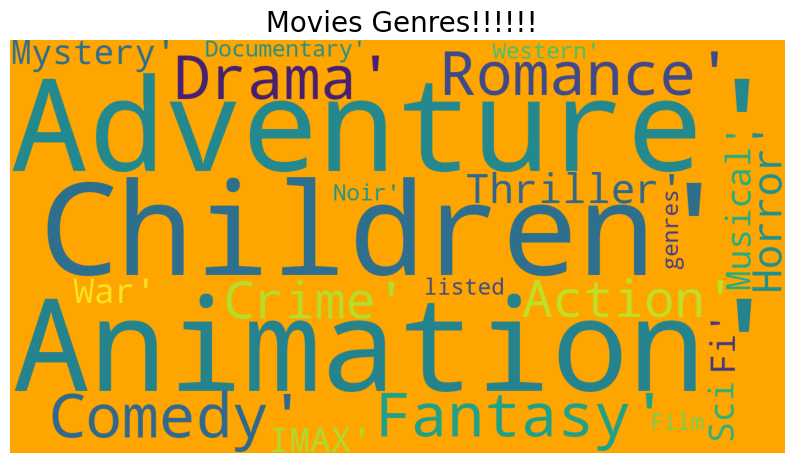

In [11]:
#Data Visualization


wordcloud_genre=WordCloud(width=1500,height=800,background_color='orange',min_font_size=2
                    ,min_word_length=3).generate(genres)
wordcloud_title=WordCloud(width=1500,height=800,background_color='red',min_font_size=2
                    ,min_word_length=3).generate(movie_title)
plt.figure(figsize=(10,10))
plt.axis('off')
plt.title(' Movies Genres!!!!!!',fontsize=20)
plt.imshow(wordcloud_genre)

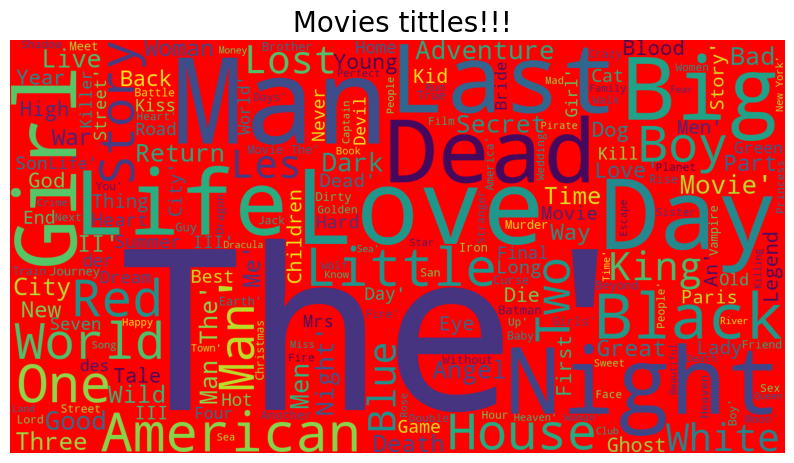

In [12]:
plt.figure(figsize=(10,10))
plt.axis('off')
plt.title(' Movies tittles!!!',fontsize=20)
plt.imshow(wordcloud_title)

In [13]:
#Merging datasets of movies and ratings
df=pd.merge(ratings,movies, how='left',on='movieId')
df

,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,1,24,1.5,1217895807,Powder (1995),Drama|Sci-Fi
2,1,32,4.0,1217896246,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,4.0,1217896556,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,4.0,1217896523,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
105334,668,142488,4.0,1451535844,Spotlight (2015),Thriller
105335,668,142507,3.5,1451535889,Pawn Sacrifice (2015),Drama
105336,668,143385,4.0,1446388585,Bridge of Spies (2015),Drama|Thriller
105337,668,144976,2.5,1448656898,Bone Tomahawk (2015),Horror|Western


#case 1

In [14]:
#Selecting only particular columns 
data1=df[['title','genres','rating']]
data1


,title,genres,rating
0,Casino (1995),Crime|Drama,4.0
1,Powder (1995),Drama|Sci-Fi,1.5
2,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,4.0
3,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,4.0
4,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,4.0
...,...,...,...
105334,Spotlight (2015),Thriller,4.0
105335,Pawn Sacrifice (2015),Drama,3.5
105336,Bridge of Spies (2015),Drama|Thriller,4.0
105337,Bone Tomahawk (2015),Horror|Western,2.5


In [15]:
#calculating average movie ratings and number of reviews

final=data1.groupby(['title','genres']).agg({'rating':['mean','count']})
final.columns=['Average movie Rating','Num Reviews']
final=final.reset_index()
final

,title,genres,Average movie Rating,Num Reviews
0,'71 (2014),Action|Drama|Thriller|War,3.500000,1
1,'Hellboy': The Seeds of Creation (2004),Action|Adventure|Comedy|Documentary|Fantasy,3.000000,1
2,'Round Midnight (1986),Drama|Musical,2.500000,1
3,'Til There Was You (1997),Drama|Romance,4.000000,3
4,"'burbs, The (1989)",Comedy,3.125000,20
...,...,...,...,...
10320,loudQUIETloud: A Film About the Pixies (2006),Documentary,4.500000,1
10321,xXx (2002),Action|Crime|Thriller,2.958333,24
10322,xXx: State of the Union (2005),Action|Crime|Thriller,2.071429,7
10323,¡Three Amigos! (1986),Comedy|Western,3.012500,40


In [16]:
#sorting average movie rating in descending order
final.sort_values("Num Reviews",ascending=False)
final=final.sort_values("Average movie Rating",ascending=False)
final




,title,genres,Average movie Rating,Num Reviews
952,Being Human (1993),Drama,5.0,1
5567,Love Exposure (Ai No Mukidashi) (2008),Action|Comedy|Drama|Romance,5.0,1
2393,Dear Diary (Caro Diario) (1994),Comedy|Drama,5.0,1
10094,Wings (1927),Action|Drama|Romance|War,5.0,2
8813,Svengali (1931),Drama|Horror,5.0,1
...,...,...,...,...
7423,Raising Cain (1992),Horror|Thriller,0.5,1
3475,Full Body Massage (1995),Drama,0.5,1
4149,High School Musical (2006),Children|Comedy|Drama|Musical|Romance,0.5,2
4150,High School Musical 2 (2007),Comedy|Drama|Musical|Romance,0.5,1


In [17]:
#taking input from user
g=input("Genre(g):").strip()
t=int(input("Minimum reviews threshold(t):"))
N=int(input("Number of recommendations:"))

Genre(g):Action
Minimum reviews threshold(t):150
Number of recommendations:5


In [18]:
#checking for the given genre in the dataset
final=final[final['genres'].str.contains(g,case=False)]
final
        

,title,genres,Average movie Rating,Num Reviews
5567,Love Exposure (Ai No Mukidashi) (2008),Action|Comedy|Drama|Romance,5.0,1
10094,Wings (1927),Action|Drama|Romance|War,5.0,2
3886,"Gunfighter, The (1950)",Action|Western,5.0,1
1764,"Chase, The (1994)",Action|Adventure|Comedy|Crime|Romance|Thriller,5.0,1
9007,"Tetsuo, the Ironman (Tetsuo) (1988)",Action|Horror|Sci-Fi|Thriller,5.0,1
...,...,...,...,...
8738,Sukiyaki Western Django (2008),Action|Western,0.5,1
1916,Clockstoppers (2002),Action|Adventure|Sci-Fi|Thriller,0.5,1
6755,Operator (2015),Action|Drama|Thriller,0.5,1
9875,"Way of War, The (2009)",Action|Thriller,0.5,1


In [19]:
#taking only the dataset where the no of reviews is greater than the specified value by user 
final=pd.DataFrame(final[(final['Num Reviews']>t)])
m=final.drop('genres',axis=1)

In [20]:
#renaming the title to movie title
s=m.rename({'title':'Movie title'},axis=1)
s.reset_index()
s.insert(0,"SL.No",range(1,1+len(s)))

CASE 1 OUTPUT

In [21]:
#printing the dataset of n rows
s[:N]


,SL.No,Movie title,Average movie Rating,Num Reviews
5877,1,"Matrix, The (1999)",4.264368,261
8587,2,Star Wars: Episode V - The Empire Strikes Back...,4.228070,228
7411,3,Raiders of the Lost Ark (Indiana Jones and the...,4.212054,224
8586,4,Star Wars: Episode IV - A New Hope (1977),4.188645,273
3185,5,Fight Club (1999),4.188406,207


# Case 2

In [22]:
cv=TfidfVectorizer()
tfidf_matrix=cv.fit_transform(movies['genres'])

In [23]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)


In [24]:
indices=pd.Series(movies.index,index=movies['title'])
titles=movies['title']
def recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]


In [25]:
p=input().strip()
N=int(input())

Matrix, The (1999)
5


In [26]:
#printing reccomendation of movies simillar to user input 
pq=pd.DataFrame(recommendations(p)[:N])
pq=pq.rename({'title':'Movie title'},axis=1)
pq.reset_index()
pq.insert(0,"SL.No",range(1,1+len(pq)))


CASE 2 OUTPUT

In [27]:
pq

,SL.No,Movie title
70,1,Screamers (1995)
147,2,Johnny Mnemonic (1995)
298,3,Virtuosity (1995)
338,4,Timecop (1994)
484,5,Blade Runner (1982)


# Case 3

In [28]:
#df1=df[['userId','movieId','rating','title']]
#df1
df1=df.pivot_table(index=['userId'],columns=['title'],values='rating')
df1

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN


In [29]:
#Normalize
matrix_norm=df1.subtract(df1.mean(axis=1),axis='rows')
matrix_norm.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
#usersimillarity
user_simillarity=matrix_norm.T.corr()
user_simillarity.head()

userId,1,2,3,4,5,6,7,8,9,10,...,659,660,661,662,663,664,665,666,667,668
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,-0.306186,0.440012,0.504099,-0.094491,0.579821,0.190592,0.423659,0.354381,-1.000000,...,0.304921,0.375769,0.414539,0.359848,0.410803,-0.536212,0.038337,0.118424,0.147106,0.360385
2,-0.306186,1.000000,0.785714,-1.000000,NaN,NaN,-0.555556,0.256406,-0.110657,NaN,...,0.000000,NaN,0.604468,0.028677,0.408248,NaN,0.678401,-0.500000,-1.000000,0.480938
3,0.440012,0.785714,1.000000,-0.250000,0.162938,NaN,-0.201332,1.000000,0.167924,-0.188982,...,0.255742,0.252223,0.730769,0.020278,0.251040,-0.491398,0.484123,0.408248,0.064282,0.160345
4,0.504099,-1.000000,-0.250000,1.000000,-0.188982,NaN,-0.118798,-1.000000,0.500000,NaN,...,-0.052414,1.000000,-0.500000,0.238130,NaN,NaN,-0.883452,0.225981,0.693722,0.224482
5,-0.094491,NaN,0.162938,-0.188982,1.000000,-0.571548,0.120497,NaN,-0.158114,NaN,...,-0.444428,NaN,NaN,0.894125,NaN,-0.651900,-0.189340,-0.191492,-0.052658,-0.186282


In [31]:
#taking iput from user
picked_userid=int(input("Userid"))
N=int(input("Num recommendations"))
k=int(input("Threshold for simillar user"))

Userid5
Num recommendations20
Threshold for simillar user20


In [32]:
#dropping the picked user id
user_simillarity.drop(index=picked_userid,inplace=True)
user_simillarity.head()

userId,1,2,3,4,5,6,7,8,9,10,...,659,660,661,662,663,664,665,666,667,668
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,-0.306186,0.440012,0.504099,-0.094491,0.579821,0.190592,0.423659,0.354381,-1.000000,...,0.304921,0.375769,0.414539,0.359848,0.410803,-0.536212,0.038337,0.118424,0.147106,0.360385
2,-0.306186,1.000000,0.785714,-1.000000,NaN,NaN,-0.555556,0.256406,-0.110657,NaN,...,0.000000,NaN,0.604468,0.028677,0.408248,NaN,0.678401,-0.500000,-1.000000,0.480938
3,0.440012,0.785714,1.000000,-0.250000,0.162938,NaN,-0.201332,1.000000,0.167924,-0.188982,...,0.255742,0.252223,0.730769,0.020278,0.251040,-0.491398,0.484123,0.408248,0.064282,0.160345
4,0.504099,-1.000000,-0.250000,1.000000,-0.188982,NaN,-0.118798,-1.000000,0.500000,NaN,...,-0.052414,1.000000,-0.500000,0.238130,NaN,NaN,-0.883452,0.225981,0.693722,0.224482
6,0.579821,NaN,NaN,NaN,-0.571548,1.000000,0.300239,NaN,NaN,1.000000,...,0.285950,NaN,NaN,0.132453,NaN,NaN,0.194389,0.642575,1.000000,-0.003187


In [33]:
#setting a random positive threshold in range from -1 to 1
user_simillarity_threshold=0.3

In [34]:
#getting to k simmilar users
simillar_users=user_simillarity[user_simillarity[picked_userid]>user_simillarity_threshold][picked_userid].sort_values(ascending=False)[:k]


In [35]:
#simillar users for input user
print(f'the simillar users for{picked_userid} are',simillar_users)

the simillar users for5 are userId
274    1.0
356    1.0
375    1.0
189    1.0
204    1.0
131    1.0
129    1.0
219    1.0
225    1.0
246    1.0
298    1.0
311    1.0
91     1.0
330    1.0
162    1.0
184    1.0
479    1.0
496    1.0
45     1.0
519    1.0
Name: 5, dtype: float64


In [36]:
#narrowing down ie removing movies which has already been watched by the target user


In [37]:
#movies watched by target user
picked_userid_watched=matrix_norm[matrix_norm.index==picked_userid].dropna(axis=1,how='all')
picked_userid_watched

title,Ace Ventura: Pet Detective (1994),Airplane II: The Sequel (1982),Aladdin (1992),Austin Powers in Goldmember (2002),Austin Powers: International Man of Mystery (1997),Austin Powers: The Spy Who Shagged Me (1999),Batman (1989),Beauty and the Beast (1991),Bolt (2008),Braveheart (1995),...,"Sixth Sense, The (1999)",Stardust (2007),Tangled (2010),Tarzan (1999),"Thin Red Line, The (1998)",Toy Story (1995),Trainspotting (1996),Up (2009),What Women Want (2000),"Witches of Eastwick, The (1987)"
userId,,,,,,,,,,,,,,,,,,,,,
5,-2.183824,-1.183824,0.316176,0.316176,0.316176,0.816176,-2.683824,0.816176,1.816176,-2.683824,...,0.316176,0.816176,1.816176,0.316176,-2.683824,0.816176,0.816176,1.816176,-0.683824,-0.683824


In [38]:
#movies that simillar users watched
simillar_user_movies=matrix_norm[matrix_norm.index.isin(simillar_users.index)].dropna(axis=1,how='all')
simillar_user_movies

title,2001: A Space Odyssey (1968),2046 (2004),24 Hour Party People (2002),25th Hour (2002),3 Women (Three Women) (1977),3:10 to Yuma (2007),"400 Blows, The (Les quatre cents coups) (1959)",8 1/2 (8½) (1963),About Schmidt (2002),About a Boy (2002),...,X-Men (2000),X-Men Origins: Wolverine (2009),X2: X-Men United (2003),"Yes, Madam (a.k.a. Police Assassins) (a.k.a. In the Line of Duty 2) (Huang gu shi jie) (1985)",Young Frankenstein (1974),Young Guns (1988),Z (1969),Zone 39 (1997),eXistenZ (1999),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
45,NaN,NaN,-1.176923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.323077,NaN,NaN,NaN,NaN,NaN
91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,0.657563,0.657563,NaN,NaN,0.657563,NaN,0.657563,0.657563,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.157563,NaN
204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.177419,NaN,NaN,NaN,NaN,NaN,NaN,0.177419,NaN,NaN


In [39]:
#dropping target user watched movies among simillar users
simillar_user_movies.drop(picked_userid_watched.columns,axis=1,inplace=True,errors='ignore')
simillar_user_movies.head()

title,2001: A Space Odyssey (1968),2046 (2004),24 Hour Party People (2002),25th Hour (2002),3 Women (Three Women) (1977),3:10 to Yuma (2007),"400 Blows, The (Les quatre cents coups) (1959)",8 1/2 (8½) (1963),About Schmidt (2002),About a Boy (2002),...,X-Men (2000),X-Men Origins: Wolverine (2009),X2: X-Men United (2003),"Yes, Madam (a.k.a. Police Assassins) (a.k.a. In the Line of Duty 2) (Huang gu shi jie) (1985)",Young Frankenstein (1974),Young Guns (1988),Z (1969),Zone 39 (1997),eXistenZ (1999),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
45,NaN,NaN,-1.176923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.323077,NaN,NaN,NaN,NaN,NaN
91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
#reccommending the movie for target user
item_score={} #dict to store scores
for i in simillar_user_movies.columns:
    movie_rating=simillar_user_movies[i]  #taking the individual ratings 
    total=0
    count=0
    for u in simillar_users.index:    #loop through simillar users
        if pd.isna(movie_rating[u])==False:
            score=simillar_users[u]*movie_rating[u]
            total+=score
            count+=1
    item_score[i]=total/count  #average score for the item
item_score=pd.DataFrame(item_score.items(),columns=['Movie title','movie_score'])
#sorting movie by score
ranked_item_score=item_score.sort_values(by='movie_score',ascending=False)

ranked_item_score.head()
        
    

,Movie title,movie_score
293,"Fast and the Furious, The (2001)",2.177419
577,Mission: Impossible II (2000),2.177419
646,"Others, The (2001)",2.177419
591,Moulin Rouge (2001),2.177419
198,Crumb (1994),2.129032


CASE 3 OUTPUT

In [41]:
#cleaning to give output as shown
ranked_item_score.reset_index()
ranked_item_score.insert(0,"SL.No",range(1,1+len(ranked_item_score)))
ranked_item_score
ranked_item_score.drop('movie_score',axis=1)[:N]




,SL.No,Movie title
293,1,"Fast and the Furious, The (2001)"
577,2,Mission: Impossible II (2000)
646,3,"Others, The (2001)"
591,4,Moulin Rouge (2001)
198,5,Crumb (1994)
11,6,Ace Ventura: When Nature Calls (1995)
93,7,Bill & Ted's Bogus Journey (1991)
384,8,Groundhog Day (1993)
94,9,Bill & Ted's Excellent Adventure (1989)
70,10,Back to the Future Part II (1989)
